In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv('car_sales.csv')

In [132]:
#1.Read top five values
df.head()

,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192.0,3.47,17.2,26,1-Apr-14
3,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-Aug-15


In [12]:
#2. Print dataframe info_data types of each column
df.dtypes

Manufacturer            object
Model                   object
Sales in thousands     float64
4-year resale value     object
Vehicle type            object
Price in thousands      object
Engine size             object
Horsepower              object
Wheelbase               object
Width                   object
Length                  object
Curb weight             object
Fuel capacity           object
Fuel efficiency         object
Latest Launch           object
dtype: object

In [26]:
#3. Print number of rows and columns
print(df.shape[0])
df.shape[1]

157


15

In [30]:
#4. Drop duplicate rows_if any
df_clean=df.drop_duplicates()
df_clean.shape

(157, 15)

In [34]:
#5. Print number of rows and columns after dropping
df_clean.shape

(157, 15)

In [38]:
#6. Print summary statistics for numerical variables
df_clean.describe()

,Sales in thousands
count,157.000000
mean,52.998076
std,68.029422
min,0.110000
25%,14.114000
50%,29.450000
75%,67.956000
max,540.561000


In [40]:
#7. Print number of missing values in each column
df_clean.isnull().sum()

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64

In [54]:
#8. Drop the column with most missing values
print(df_clean.isnull().sum().idxmax())

Manufacturer


In [56]:
#9. Drop the rows with categorical missing values
categorical_cols = df_clean.select_dtypes(include=["object"]).columns  # Select categorical columns
df_clean.dropna(subset=categorical_cols, inplace=True)


In [60]:
#10. Import the rows with numerical missing values
numerical_cols = df_clean.select_dtypes(include=["number"]).columns  # Select numerical columns
df_clean[numerical_cols] = df_clean[numerical_cols].fillna(df_clean[numerical_cols].mean())  # Fill with mean
df_clean.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


In [64]:
#11. Sort the data w.r.t price_find the details of the most and the least expensive cars
df_sorted = df_clean.sort_values(by="Price in thousands", ascending=False)
print("Most Expensive Car:\n", df_sorted.iloc[0])
print("Least Expensive Car:\n", df_sorted.iloc[-1])


Most Expensive Car:
 Manufacturer               Hyundai      
Model                  Accent           
Sales in thousands                41.184
4-year resale value                 5.86
Vehicle type                   Passenger
Price in thousands                 9.699
Engine size                          1.5
Horsepower                            92
Wheelbase                           96.1
Width                               65.7
Length                             166.7
Curb weight                         2.24
Fuel capacity                       11.9
Fuel efficiency                       31
Latest Launch                   9-Oct-14
Name: 62, dtype: object
Least Expensive Car:
 Manufacturer               Acura        
Model                  CL               
Sales in thousands                14.114
4-year resale value               18.225
Vehicle type                   Passenger
Price in thousands                     .
Engine size                          3.2
Horsepower                     

In [72]:
#12. Write a function to find min and max values of any column
print("min :",df['Price in thousands'].min(),"Max : ", df['Price in thousands'].max())


min : . Max :  9.699


In [78]:
#13. Call the above function to find min max of horse power, length, fuel efficiency
horsepower_min, horsepower_max = find_min_max("Horsepower")
length_min, length_max = find_min_max("Length")
fuel_eff_min, fuel_eff_max = find_min_max("Fuel efficiency")

print(f"Horsepower Min: {horsepower_min}, Max: {horsepower_max}")
print(f"Length Min: {length_min}, Max: {length_max}")
print(f"Fuel Efficiency Min: {fuel_eff_min}, Max: {fuel_eff_max}")



Horsepower Min: ., Max: 92
Length Min: ., Max: 224.5
Fuel Efficiency Min: ., Max: 45


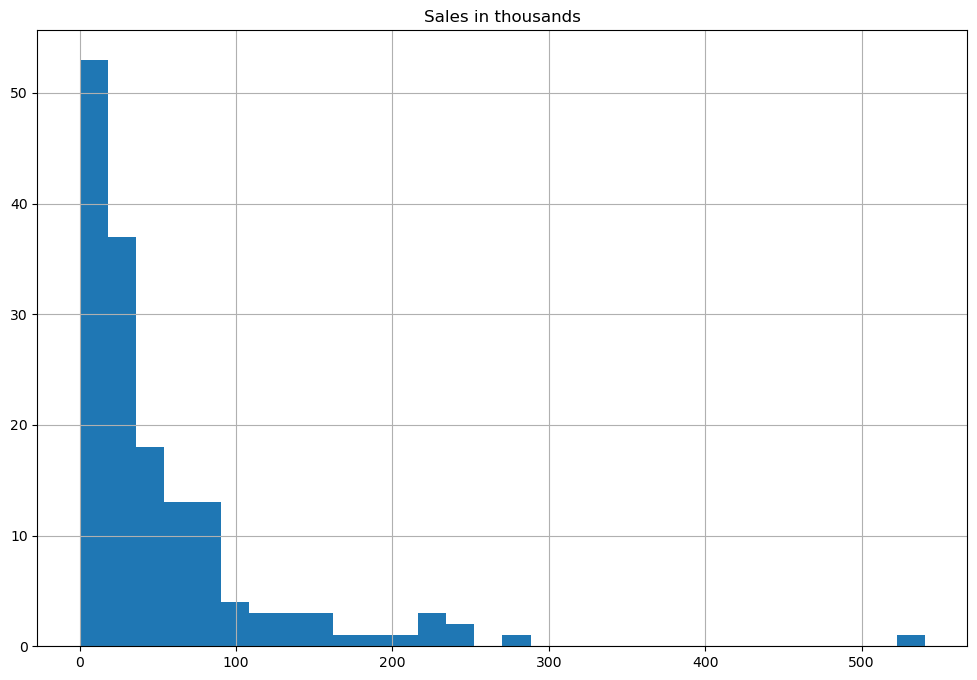

In [92]:
#14. Plot histogram of continuous numerical variable : price,sales,hoursepower,fuelefficiency
df_clean[["Price in thousands", "Sales in thousands", "Horsepower", "Fuel efficiency"]].hist(bins=30, figsize=(12, 8))
plt.show()


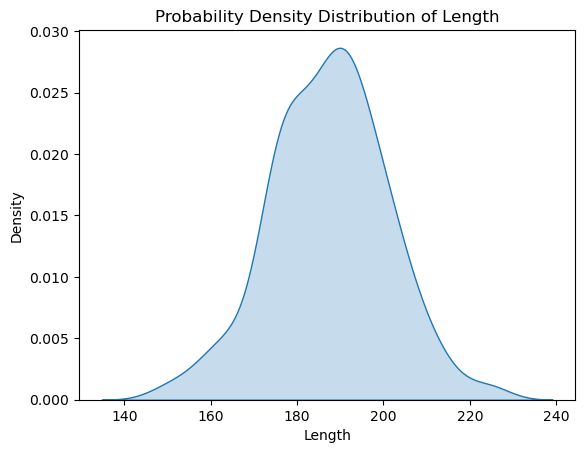

In [108]:
#15. Probability density distribution of continuous numerical variable-length
sns.kdeplot(df["Length"], fill=True)
plt.title("Probability Density Distribution of Length")
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()



In [116]:
print(df.columns)


Index(['Model', 'Sales in thousands', '4-year resale value', 'Vehicle type',
       'Price in thousands', 'Engine size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb weight', 'Fuel capacity', 'Fuel efficiency',
       'Latest Launch'],
      dtype='object')


In [118]:
#16. Count by category –group by manufacture
manufacturer_count = df_clean.groupby("Manufacturer")["Manufacturer"].count()
print(manufacturer_count)


Manufacturer
Acura             4
Audi              3
BMW               3
Buick             4
Cadillac          5
Chevrolet         9
Chrysler          7
Dodge            11
Ford             11
Honda             5
Hyundai           3
Infiniti          1
Jaguar            1
Jeep              3
Lexus             6
Lincoln           3
Mercedes-Benz     9
Mercury           6
Mitsubishi        7
Nissan            7
Oldsmobile        6
Plymouth          4
Pontiac           6
Porsche           3
Saab              2
Saturn            5
Subaru            2
Toyota            9
Volkswagen        6
Volvo             6
Name: Manufacturer, dtype: int64


In [120]:
#17. Select all numerical variables
numerical_df = df_clean.select_dtypes(include=["number"])
print(numerical_df.head())


   Sales in thousands
0              16.919
1              39.384
2              14.114
3               8.588
4              20.397


In [144]:
#18. Print correlation coefficient value of price and sales
df_clean["Price in thousands"] = pd.to_numeric(df_clean["Price in thousands"], errors='coerce')
df_clean["Sales in thousands"] = pd.to_numeric(df_clean["Sales in thousands"], errors='coerce')
print(df_clean.isnull().sum())



Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     2
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64


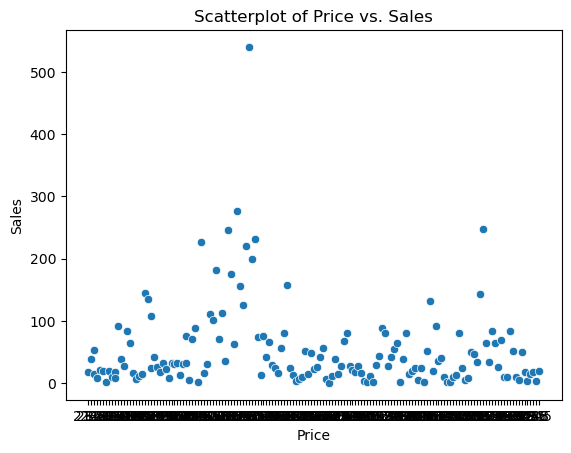

In [148]:
#19. Plot correlation of price and sales using scatterplot
sns.scatterplot(x=df["Price in thousands"], y=df["Sales in thousands"])
plt.xlabel("Price")
plt.ylabel("Sales")
plt.title("Scatterplot of Price vs. Sales")
plt.show()


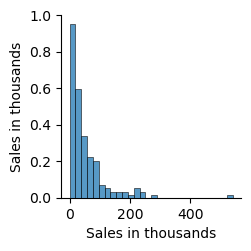

In [154]:
#20.Pair plot
sns.pairplot(df[["Price in thousands", "Sales in thousands", "Horsepower", "Fuel efficiency"]])
plt.show()


In [158]:
#21. Boxplot of sales of different manufacturer
plt.figure(figsize=(12, 6))
sns.boxplot(x="Manufacturer", y="sales", data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Sales by Manufacturer")
plt.show()


ValueError: Could not interpret value `Manufacturer` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>